In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

# to suppress the warnings:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
digits=load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
X=digits.data
y=digits.target

X.shape,y.shape

((1797, 64), (1797,))

In [5]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
#Standardize the data 
X_std= StandardScaler().fit_transform(X)
X_std.shape

(1797, 64)

In [8]:
#Covariance Matrix
cov_matrix = np.cov(X_std.T)
print(cov_matrix.shape)
print('Covariance Matrix \n', cov_matrix)
print(cov_matrix.min())
print(cov_matrix.max())

(64, 64)
Covariance Matrix 
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]
-0.57051363323811
1.0005567928731212


In [9]:
#Eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(len(eig_vals))
print(eig_vecs.shape)

64
(64, 64)


In [10]:
print('Eigen Vectors \n:', eig_vecs)
print('\n Eigen Values \n:', eig_vals)

Eigen Vectors 
: [[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.18223392 -0.04702701  0.02358821 ...  0.          0.
   0.        ]
 [ 0.285868   -0.0595648  -0.05679875 ...  0.          0.
   0.        ]
 ...
 [ 0.103198    0.24261778 -0.02227952 ...  0.          0.
   0.        ]
 [ 0.1198106   0.16508926  0.10036559 ...  0.          0.
   0.        ]
 [ 0.07149362  0.07132924  0.09244589 ...  0.          0.
   0.        ]]

 Eigen Values 
: [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.27692285 0.05037444 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.0901854

In [11]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eigen_pairs_sorted = eigen_pairs.sort(key = lambda x: x[0], reverse= True)

In [12]:
# Cumulative Variance Explained:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained \n:", cum_var_exp)

Cumulative Variance Explained 
: [ 12.0339161   21.5949705   30.03938539  36.5377933   41.39794818
  45.61206805  49.55415085  52.94353177  55.94175279  58.87375534
  61.6555608   64.23261589  66.50791921  68.73509895  70.90032838
  72.81449499  74.59004207  76.22811135  77.82457152  79.3137627
  80.66173227  81.93366364  83.09950099  84.15714759  85.13246353
  86.07702252  86.94003635  87.77667921  88.57437245  89.32084382
  90.04642598  90.73833722  91.39224576  92.03303833  92.62442244
  93.19558485  93.71922165  94.20102924  94.6547485   95.07791125
  95.48396432  95.88104913  96.23754243  96.57832961  96.90616495
  97.21719696  97.50577225  97.78226151  98.04143645  98.27591946
  98.49417632  98.69777395  98.89328638  99.07660488  99.24455127
  99.40578733  99.55355002  99.68866843  99.81376918  99.91746491
 100.         100.         100.         100.        ]


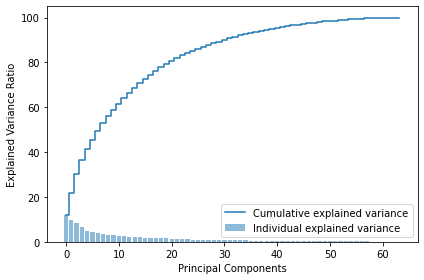

In [13]:
# Summary Plot of the cumulative Variance Explained:

plt.figure(figsize=(6 , 4))
plt.bar(range(64), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(64), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## Building Model using KMeans algorithm before Applying PCA

In [14]:
cluster=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_std)
    cluster.append(kmeans.inertia_)

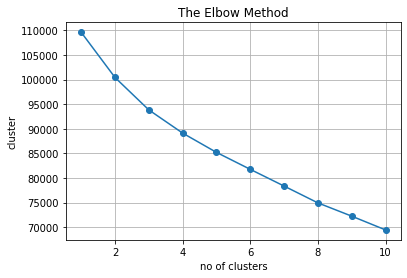

In [16]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), cluster,marker='o')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('cluster')
plt.grid()
plt.show()

In [20]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

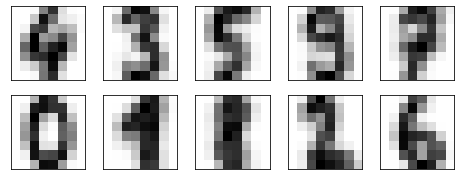

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [22]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
labels

array([0, 8, 8, ..., 8, 9, 9], dtype=int32)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

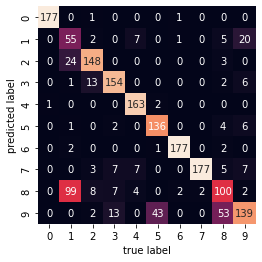

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [25]:
# Classification Report:

print('Classification Report:')
classification1=classification_report(digits.target, labels)
print(classification1)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.61      0.30      0.40       182
           2       0.85      0.84      0.84       177
           3       0.88      0.84      0.86       183
           4       0.98      0.90      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.45      0.57      0.50       174
           9       0.56      0.77      0.65       180

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.79      1797
weighted avg       0.81      0.79      0.79      1797



## Building Model using KMeans algorithm after Applying PCA

In [26]:
# Applying PCA using sklearn:
digits.data1 = PCA(n_components=64)
X_std1=digits.data1.fit_transform(X_std)
digits.data1

PCA(n_components=64)

In [27]:
X_std1

array([[ 1.91421366e+00, -9.54501571e-01, -3.94603482e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  8.24385469e-15],
       [ 5.88980330e-01,  9.24635800e-01,  3.92475494e+00, ...,
         7.08937780e-16,  1.99271523e-16,  3.08670512e-17],
       [ 1.30203906e+00, -3.17188827e-01,  3.02333293e+00, ...,
         3.28699317e-16,  1.25027993e-16,  2.15555254e-17],
       ...,
       [ 1.02259599e+00, -1.47910870e-01,  2.46997365e+00, ...,
        -1.16384757e-16,  1.21081378e-17,  1.79387514e-17],
       [ 1.07605522e+00, -3.80906254e-01, -2.45548693e+00, ...,
        -1.52959072e-17,  2.02130078e-17, -2.28690666e-17],
       [-1.25770233e+00, -2.22759088e+00,  2.83627891e-01, ...,
        -3.62744615e-17, -2.28083881e-17,  5.00149356e-17]])

In [28]:
kmeans1 = KMeans(n_clusters=10, random_state=0)
clusters1 = kmeans1.fit_predict(X_std1)
kmeans1.cluster_centers_.shape

(10, 64)

In [29]:
from scipy.stats import mode

labels1 = np.zeros_like(clusters1)
for i in range(10):
    mask = (clusters1 == i)
    labels1[mask] = mode(digits.target[mask])[0]
labels1

array([0, 8, 8, ..., 8, 3, 3], dtype=int32)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels1)

0.6199220923761826

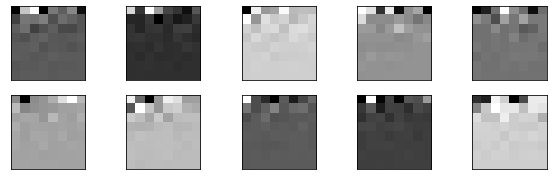

In [31]:
fig, ax = plt.subplots(2, 5, figsize=(10, 3))
centers1 = kmeans1.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers1):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

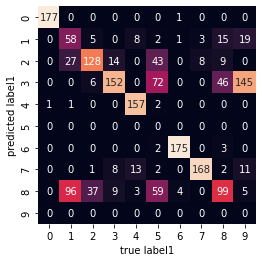

In [32]:
from sklearn.metrics import confusion_matrix
mat1 = confusion_matrix(digits.target, labels1)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label1')
plt.ylabel('predicted label1');

In [33]:
# Classification Report2:

print('Classification Report:')
classification2=classification_report(digits.target, labels1)
print(classification2)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.52      0.32      0.40       182
           2       0.56      0.72      0.63       177
           3       0.36      0.83      0.50       183
           4       0.98      0.87      0.92       181
           5       0.00      0.00      0.00       182
           6       0.97      0.97      0.97       181
           7       0.82      0.94      0.88       179
           8       0.32      0.57      0.41       174
           9       0.00      0.00      0.00       180

    accuracy                           0.62      1797
   macro avg       0.55      0.62      0.57      1797
weighted avg       0.55      0.62      0.57      1797

